# Topic modelling Example 

https://pycaret.gitbook.io/docs/learn-pycaret/official-blog/nlp-text-classification-in-python-using-pycaret#iv.-pycaret-approach

In [2]:
import pycaret
from pycaret.datasets import get_data


In [3]:
# load dataset
data = get_data('kiva')

,country,en,gender,loan_amount,nonpayment,sector,status
0,Dominican Republic,"""Banco Esperanza"" is a group of 10 women looki...",F,1225,partner,Retail,0
1,Dominican Republic,"""Caminemos Hacia Adelante"" or ""Walking Forward...",F,1975,lender,Clothing,0
2,Dominican Republic,"""Creciendo Por La Union"" is a group of 10 peop...",F,2175,partner,Clothing,0
3,Dominican Republic,"""Cristo Vive"" (""Christ lives"" is a group of 10...",F,1425,partner,Clothing,0
4,Dominican Republic,"""Cristo Vive"" is a large group of 35 people, 2...",F,4025,partner,Food,0


In [4]:
# check shape of data
data.shape

(6818, 7)

In [5]:
# print first document
print(data['en'][0])

"Banco Esperanza" is a group of 10 women looking to receive a small loan. Each of them has taken out a very small loan already, so this would be their second. With this loan the group is going to try and expand their small businesses and start generating more income. <P>

Eduviges is the group representative and leader of the group. Eduviges has a lot on the line because she has 6 children that she has to take care of. She told me that those children are the reason she wants to be successful. She wants to be able to provide a different life for them and show them that they can be successful as well. <P>

Eduviges has a very small business selling shoes and Avon products. She plans to expand using this loan and dreams of success. The whole group is ready for this new challenge and are on the road to bettering their lives. On behalf of Eduviges, the group, and Esperanza International--------- Thank you for your support!!!!


In [6]:
# sampling the data to select only 1000 documents
data = data.sample(1000, random_state=786).reset_index(drop=True)
data.shape

(1000, 7)

# Setup

In [7]:
# init setup
from pycaret.nlp import *
s = setup(data, target = 'en', session_id=123)

Description,Value
session_id,123
Documents,1000
Vocab Size,4588
Custom Stopwords,False


# Create Model

In [8]:
# the models available in pycaret.nlp
models()

,Name,Reference
ID,,
lda,Latent Dirichlet Allocation,gensim/models/ldamodel
lsi,Latent Semantic Indexing,gensim/models/lsimodel
hdp,Hierarchical Dirichlet Process,gensim/models/hdpmodel
rp,Random Projections,gensim/models/rpmodel
nmf,Non-Negative Matrix Factorization,sklearn.decomposition.NMF


## To train a model

In [9]:
lda = create_model('lda')
print(lda)

LdaModel(num_terms=4588, num_topics=4, decay=0.5, chunksize=100)


# Assign Model

In [10]:
lda_results = assign_model(lda)
lda_results.head()

,country,en,gender,loan_amount,nonpayment,sector,status,Topic_0,Topic_1,Topic_2,Topic_3,Dominant_Topic,Perc_Dominant_Topic
0,Kenya,praxide marry child primary school train tailo...,F,75,partner,Services,0,0.682645,0.174738,0.142211,0.000406,Topic 0,0.68
1,Kenya,gynaecology practitioner run year old live wif...,M,1200,partner,Health,0,0.003994,0.156257,0.839335,0.000414,Topic 2,0.84
2,Dominican Republic,live child boy girl range year old sell used w...,F,150,partner,Clothing,0,0.004554,0.852971,0.142008,0.000468,Topic 1,0.85
3,Kenya,phanice marry child daughter secondary school ...,F,150,lender,Services,1,0.769483,0.225918,0.004099,0.000500,Topic 0,0.77
4,Kenya,year old hotel kaptembwa operate hotel last ye...,F,300,lender,Food,1,0.636042,0.242644,0.120901,0.000414,Topic 0,0.64


# Analyze Model

In [11]:
# Frequency distribution of entire corpus
plot_model()

In [12]:
# top 100 bigrams on entire corpus
plot_model(plot='bigram')

In [13]:
# frequency distribution of topic 1
plot_model(lda, plot = 'frequency', topic_num = 'Topic 1')

In [14]:
# Topic distribution 
plot_model(lda, plot = 'topic_distribution')

In [15]:
# T-distributed Stochastic Neighbor Embedding (t-SNE)
plot_model(lda, plot = 'tsne')

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


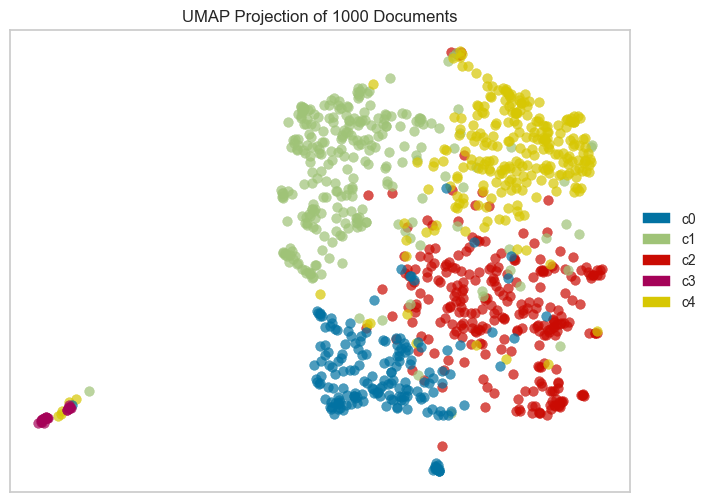

In [16]:
# Uniform Manifold Approximation and Projection Plot
plot_model(lda, plot = 'umap')

# Evaluate Model

In [17]:
evaluate_model(lda)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Frequency Plot', 'freque…

# Model Building

In [18]:
lda_results.drop(['country','en','gender','loan_amount','nonpayment','sector','Dominant_Topic','Perc_Dominant_Topic'],
    axis=1, inplace=True)
lda_results.head()

,status,Topic_0,Topic_1,Topic_2,Topic_3
0,0,0.682645,0.174738,0.142211,0.000406
1,0,0.003994,0.156257,0.839335,0.000414
2,0,0.004554,0.852971,0.142008,0.000468
3,1,0.769483,0.225918,0.004099,0.000500
4,1,0.636042,0.242644,0.120901,0.000414


In [19]:
from pycaret.classification import *
pce_1 = setup(data = lda_results, target = 'status', session_id=5, train_size=0.85)

,Description,Value
0,session_id,5
1,Target,status
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(1000, 5)"
5,Missing Values,False
6,Numeric Features,4
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [20]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.7032,0.7494,0.6558,0.7283,0.6877,0.4067,0.4109,0.0380
ada,Ada Boost Classifier,0.7020,0.7309,0.6560,0.7244,0.6864,0.4046,0.4080,0.0300
lr,Logistic Regression,0.7009,0.7101,0.6630,0.7197,0.6882,0.4021,0.4052,0.5400
ridge,Ridge Classifier,0.7009,0.0000,0.6630,0.7197,0.6882,0.4021,0.4052,0.0040
lda,Linear Discriminant Analysis,0.7009,0.7066,0.6630,0.7197,0.6882,0.4021,0.4052,0.0050
nb,Naive Bayes,0.6961,0.7077,0.6440,0.7228,0.6797,0.3925,0.3962,0.0050
rf,Random Forest Classifier,0.6926,0.7460,0.6819,0.7013,0.6891,0.3855,0.3878,0.0800
lightgbm,Light Gradient Boosting Machine,0.6773,0.7308,0.6609,0.6886,0.6714,0.3551,0.3582,0.0190
svm,SVM - Linear Kernel,0.6750,0.0000,0.7095,0.6796,0.6861,0.3489,0.3557,0.0050
et,Extra Trees Classifier,0.6725,0.7149,0.6748,0.6748,0.6708,0.3453,0.3491,0.0820


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=5, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

# Hyperparameters Tuning

In [21]:
# creating model based on above results 
pce_1_m1 = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6588,0.6788,0.5814,0.6944,0.6329,0.3189,0.3233
1,0.7294,0.8112,0.6977,0.7500,0.7229,0.4592,0.4603
2,0.6941,0.7046,0.5814,0.7576,0.6579,0.3898,0.4010
3,0.7412,0.7979,0.7907,0.7234,0.7556,0.4817,0.4839
4,0.6706,0.7198,0.5581,0.7273,0.6316,0.3429,0.3528
5,0.6824,0.7121,0.6047,0.7222,0.6582,0.3658,0.3709
6,0.7412,0.7647,0.7442,0.7442,0.7442,0.4823,0.4823
7,0.6941,0.7572,0.6429,0.7105,0.6750,0.3875,0.3892
8,0.7294,0.7788,0.6429,0.7714,0.7013,0.4577,0.4641


In [22]:
# model tuning
tuned_pce_1_m1 = tune_model(pce_1_m1, n_iter=50)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6353,0.6883,0.5581,0.6667,0.6076,0.2719,0.2756
1,0.7059,0.7857,0.6512,0.7368,0.6914,0.4125,0.4154
2,0.7412,0.7641,0.6977,0.7692,0.7317,0.4829,0.4850
3,0.7529,0.8101,0.7907,0.7391,0.7640,0.5054,0.5067
4,0.7294,0.7301,0.6512,0.7778,0.7089,0.4598,0.4661
5,0.6941,0.7110,0.6744,0.7073,0.6905,0.3885,0.3889
6,0.7412,0.7425,0.7442,0.7442,0.7442,0.4823,0.4823
7,0.7412,0.7918,0.7143,0.7500,0.7317,0.4820,0.4825
8,0.7176,0.7591,0.6905,0.7250,0.7073,0.4349,0.4354


In [23]:
# getting insights from model performance
evaluate_model(tuned_pce_1_m1)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…